In [326]:
import numpy as np
import torch
import pandas as pd
import openpyxl
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
print('Setup Complete')

Setup Complete


Import the .csv file from blackboard using pandas 

In [247]:
building_load_dataset='C:/Users/Acer/Desktop/AI & Machine Learning/Homework/Midterm/Building_Load_Dataset.csv'
building_data=pd.read_csv(building_load_dataset)
building_data.describe()

,Barometer,Hygrometer,Rain Gauge,Solar Radiation Sensor,Thermometer,Wind Vane,Load
count,8216.000000,8216.000000,8212.000000,8216.000000,8216.000000,8215.000000,8216.000000
mean,29.819179,35.355891,0.116963,235.668087,73.372651,351.356665,123.402012
std,0.165792,21.404209,0.256712,304.533733,8.574128,40.738703,24.732124
min,29.260000,1.000000,0.000000,0.000000,43.900000,5.000000,63.830000
25%,29.723000,14.000000,0.000000,0.000000,67.900000,360.000000,110.827500
50%,29.809000,43.000000,0.000000,69.000000,73.500000,360.000000,122.170000
75%,29.914000,53.000000,0.090000,397.000000,79.400000,360.000000,137.085000
max,30.351000,74.000000,1.650000,1262.000000,95.600000,360.000000,256.990000


In [248]:
pd.DataFrame(data=building_data)

,Timestamp,Barometer,Hygrometer,Rain Gauge,Solar Radiation Sensor,Thermometer,Wind Vane,Load
0,6/1/2020 0:00,30.099,59,0.0,0,49.7,360.0,91.06
1,6/1/2020 0:15,30.097,60,0.0,0,49.5,360.0,90.29
2,6/1/2020 0:30,30.099,61,0.0,0,49.2,360.0,90.98
3,6/1/2020 0:45,30.096,62,0.0,0,48.7,360.0,85.53
4,6/1/2020 1:00,30.097,63,0.0,0,48.2,360.0,81.57
...,...,...,...,...,...,...,...,...
8211,8/31/2020 22:15,29.866,46,0.0,0,70.5,360.0,119.18
8212,8/31/2020 22:45,29.875,45,0.0,0,70.3,360.0,119.02
8213,8/31/2020 23:00,29.875,46,0.0,0,70.3,360.0,96.34
8214,8/31/2020 23:15,29.879,45,0.0,0,70.1,360.0,119.19


Dropping the null data points

In [249]:
building_data = building_data.dropna(axis=0)

In [250]:
building_data.columns

Index(['Timestamp', 'Barometer', 'Hygrometer', 'Rain Gauge',
       'Solar Radiation Sensor', 'Thermometer', 'Wind Vane', 'Load'],
      dtype='object')

Seperating the load coloumn as target dataset

In [251]:
building_target=building_data.Load

Converting the pandas data into numpy and reading the size of the data

In [252]:
targets = building_target.to_numpy()
print(targets)
print(targets.shape)

[ 91.06  90.29  90.98 ...  96.34 119.19 107.71]
(8211,)


In [253]:
all_building_features=['Barometer', 'Hygrometer', 'Rain Gauge', 'Solar Radiation Sensor', 'Thermometer', 'Wind Vane']
features_data=building_data[all_building_features]
all_features=features_data.to_numpy()
print(all_features)
print(all_features.shape)

[[ 30.099  59.      0.      0.     49.7   360.   ]
 [ 30.097  60.      0.      0.     49.5   360.   ]
 [ 30.099  61.      0.      0.     49.2   360.   ]
 ...
 [ 29.875  46.      0.      0.     70.3   360.   ]
 [ 29.879  45.      0.      0.     70.1   360.   ]
 [ 29.885  40.      0.      0.     70.    360.   ]]
(8211, 6)


Comparing the target dataset with the feature dataset

In [254]:
print(np.corrcoef(all_features, targets, rowvar=False)[:,6])

[-0.30781244  0.07312783  0.12585602  0.26265928  0.75560319  0.05761273
  1.        ]


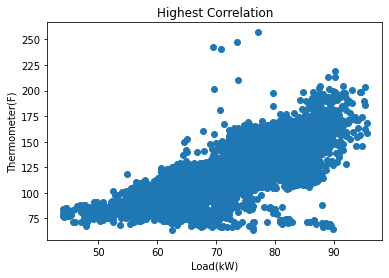

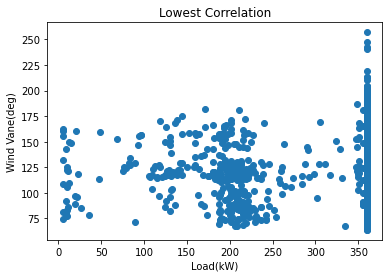

In [255]:
fig=plt.figure()
plt.subplot(1,1,1)
plt.plot(all_features[:,4],targets,'o')
plt.xlabel('Load(kW)')
plt.ylabel('Thermometer(F)')
plt.title('Highest Correlation')
plt.show()
plt.subplot(1,1,1)
plt.plot(all_features[:,5],targets,'o')
plt.xlabel('Load(kW)')
plt.ylabel('Wind Vane(deg)')
plt.title('Lowest Correlation')
plt.show()

Feature selection

In [256]:
building_features=['Barometer', 'Solar Radiation Sensor', 'Thermometer']
features_data=building_data[building_features]
features=features_data.to_numpy()
print(features)
print(features.shape)

[[30.099  0.    49.7  ]
 [30.097  0.    49.5  ]
 [30.099  0.    49.2  ]
 ...
 [29.875  0.    70.3  ]
 [29.879  0.    70.1  ]
 [29.885  0.    70.   ]]
(8211, 3)


In [257]:
targets=targets.reshape(-1,1)
np.random.seed(5)
idx = np.random.permutation(features.shape[0]) 
trn_idx, tst_idx = idx[:6900], idx[6900:] 
F_train, F_test = features[trn_idx, :], features[tst_idx, :]
T_train, T_test = targets[trn_idx, :], targets[tst_idx, :]
print(F_train.shape, F_test.shape)
print(T_train.shape, T_test.shape)

(6900, 3) (1311, 3)
(6900, 1) (1311, 1)


In [258]:
kf = KFold(n_splits=K, shuffle=True)
kf.split(features)
for a, b in kf.split(features):
    print(len(a), len(b))
    print(a[:10], b[:10])

7038 1173
[ 0  1  2  3  4  6  7  9 10 11] [ 5  8 12 17 22 31 32 33 37 40]
7038 1173
[ 0  1  2  3  4  5  6  7  8 10] [ 9 13 15 19 29 41 49 50 61 69]
7038 1173
[ 0  1  2  3  4  5  7  8  9 10] [ 6 16 36 39 44 46 54 59 62 64]
7038 1173
[ 0  1  2  3  5  6  7  8  9 10] [  4  23  28  42  63  68  82  94  95 101]
7038 1173
[ 2  3  4  5  6  7  8  9 10 11] [ 0  1 18 21 35 53 56 60 73 84]
7038 1173
[ 0  1  3  4  5  6  7  8  9 11] [ 2 10 24 27 30 43 70 72 74 79]
7038 1173
[ 0  1  2  4  5  6  8  9 10 12] [ 3  7 11 14 20 25 26 34 38 45]


In [259]:
def kfold_CV(X, Y, K, N, learning_rate):
    kf = KFold(n_splits=K, shuffle=True)
    rmse_trn, rmse_tst = np.empty(0), np.empty(0)

    for trn_idx, tst_idx in kf.split(X):
        X_train, X_test = X[trn_idx, :], X[tst_idx, :]
        Y_train, Y_test = Y[trn_idx, :], Y[tst_idx, :]

        mdl = train(X_train=X_train, Y_train=Y_train, N=N, learning_rate=learning_rate)
        with torch.no_grad():
            yhat_trn = mdl(torch.from_numpy(X_train).float()).numpy()
            yhat_tst = mdl(torch.from_numpy(X_test).float()).numpy()

        rmse_trn = np.append(rmse_trn, rmse(yhat_trn, Y_train))
        rmse_tst = np.append(rmse_tst, rmse(yhat_tst, Y_test))

    return rmse_trn.mean(), rmse_tst.mean()

Hyperparameter optimization

In [347]:
N_list = list(range(2, 5))
lr_list = [10**i for i in range(-4, -1)]

rmse_trn = np.zeros((len(N_list), len(lr_list)))
rmse_tst = np.zeros_like(rmse_trn)

for n, N in enumerate(N_list):
    for l, lr in enumerate(lr_list):
        trn_val, tst_val = kfold_CV(F_train, T_train, K, N, lr)
        rmse_trn[n, l] = trn_val
        rmse_tst[n, l] = tst_val

        print('N = {}, lr = {}: Training RMSE = {}, Cross Validation RMSE = {}'.format(
                N, lr, trn_val, tst_val
            ))

i, j = np.argwhere(rmse_tst == np.min(rmse_tst))[0]
n_best = N_list[i]
lr_best = lr_list[j]
print(n_best, lr_best)

N = 2, lr = 0.0001: Training RMSE = 127.72679167255676, Cross Validation RMSE = 127.32304034829458
N = 2, lr = 0.001: Training RMSE = 64.95383839346175, Cross Validation RMSE = 64.9980945704094
N = 2, lr = 0.01: Training RMSE = 45.49694082995789, Cross Validation RMSE = 45.698045879066186
N = 3, lr = 0.0001: Training RMSE = 109.31503457235726, Cross Validation RMSE = 109.38762851425318
N = 3, lr = 0.001: Training RMSE = 38.048811321119764, Cross Validation RMSE = 37.812686451151826
N = 3, lr = 0.01: Training RMSE = 17.028180483918124, Cross Validation RMSE = 16.995460181675078
N = 4, lr = 0.0001: Training RMSE = 113.82641080858033, Cross Validation RMSE = 113.97014453132154
N = 4, lr = 0.001: Training RMSE = 24.386550603946265, Cross Validation RMSE = 24.297347536748777
N = 4, lr = 0.01: Training RMSE = 16.39236225400345, Cross Validation RMSE = 16.416899710419862
4 0.01


Creating 3 two-layer neural network models

In [316]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, input_features, neurons, output_features):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_features, neurons)
        self.linear2 = torch.nn.Linear(neurons, output_features)

    def forward(self, x):
        return self.linear2(self.linear1(x).clamp(min=0))

In [317]:
def train(X_train, Y_train, N, learning_rate, epochs=1000):
    model = TwoLayerNet(X_train.shape[1], N, Y_train.shape[1])
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        inputs = torch.from_numpy(X_train).float()
        labels = torch.from_numpy(Y_train).float()

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

    return model

In [318]:
def rmse(yhat, y):
    return np.sqrt(np.mean((yhat - y) ** 2))

In [319]:
def plot_results(T_measured, T_predicted, model):
    plt.figure()
    plt.subplot(1,1,1)
    plt.plot(T_predicted, label='Predictions')
    plt.plot(T_measured, label='Measured')
    plt.legend()

RMSE: 16.621998269409968 


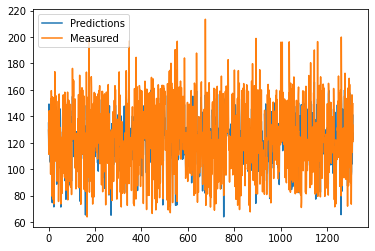

In [357]:
modelNN1 = train(X_train=F_train, Y_train=T_train, N=4, learning_rate=0.01, epochs=1000)
with torch.no_grad():
    T_predicted = modelNN1(torch.from_numpy(F_test).float()).numpy()
rmseNN1 = rmse(T_test, T_predicted)
print('RMSE: {} '.format(rmseNN1))
plot_results(T_test, T_predicted, modelNN1)
plt.savefig('neuralnetwork1.png', bbox_inches='tight', pad_inches=2, transparent=True)

RMSE: 20.074929698642336 


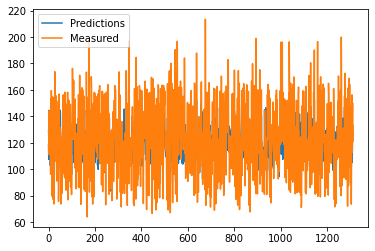

In [355]:
modelNN2 = train(X_train=F_train, Y_train=T_train, N=4, learning_rate=0.001, epochs=1000)
with torch.no_grad():
    T_predicted = modelNN2(torch.from_numpy(F_test).float()).numpy()
rmseNN2 = rmse(T_test, T_predicted)
print('RMSE: {} '.format(rmseNN2))
plot_results(T_test, T_predicted, modelNN2)
plt.savefig('neuralnetwork2.png', bbox_inches='tight', pad_inches=2, transparent=True)

RMSE: 17.405206260620346 


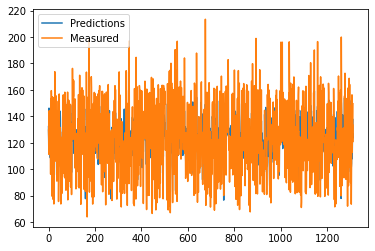

In [359]:
modelNN3 = train(X_train=F_train, Y_train=T_train, N=3, learning_rate=0.001, epochs=1000)
with torch.no_grad():
    T_predicted = modelNN3(torch.from_numpy(F_test).float()).numpy()
rmseNN3 = rmse(T_test, T_predicted)
print('RMSE: {} '.format(rmseNN3))
plot_results(T_test, T_predicted, modelNN3)
plt.savefig('neuralnetwrok3.png', bbox_inches='tight', pad_inches=2, transparent=True)

Creating 2 linear regression model with and without regularization

In [342]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [311]:
def train1(X_train, Y_train, epochs, p):
    in_size = X_train.shape[1]
    out_size = Y_train.shape[1]
    lr = 0.01
    model = linearRegression(in_size, out_size)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        inputs = torch.from_numpy(X_train).float()
        labels = torch.from_numpy(Y_train).float()

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        if p:
            reg_term = torch.norm(model.linear.weight, p=p) 
        else:
            reg_term = 0
        loss += reg_term
        loss.backward()

        optimizer.step()

        if epoch % 50 == 0:
            print('epoch {}: loss = {}'.format(epoch, loss.item()))

    return model

In [312]:
def print_weights_biases(model):
    print(model.linear.weight.detach())
    print(model.linear.bias.detach())

epoch 0: loss = 84337.7734375
epoch 50: loss = 12953.6845703125
epoch 100: loss = 5111.94970703125
epoch 150: loss = 3347.45556640625
epoch 200: loss = 2083.214599609375
epoch 250: loss = 1270.19091796875
epoch 300: loss = 796.1403198242188
epoch 350: loss = 543.1527099609375
epoch 400: loss = 418.90679931640625
epoch 450: loss = 362.5251770019531
epoch 500: loss = 338.7676696777344
epoch 550: loss = 329.37738037109375
epoch 600: loss = 325.7967834472656
epoch 650: loss = 324.3735046386719
epoch 700: loss = 323.68157958984375
epoch 750: loss = 323.210693359375
epoch 800: loss = 322.79327392578125
epoch 850: loss = 322.3786926269531
epoch 900: loss = 321.9532165527344
epoch 950: loss = 321.5133972167969
tensor([[0.9757, 0.0040, 1.2528]])
tensor([2.0391])
Regularization: None
RMSE: 18.478447017299125 


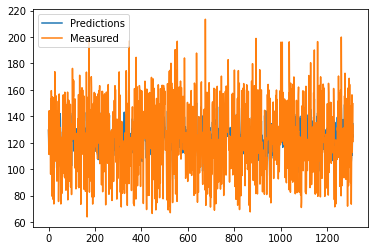

In [313]:
modelLR = train1(X_train=F_train, Y_train=T_train, epochs=1000, p=0)
with torch.no_grad():
    T_predicted = modelLR(torch.from_numpy(F_test).float()).numpy()
print_weights_biases(modelLR)
rmse1 = rmse(T_test, T_predicted)
print('Regularization: None')
print('RMSE: {} '.format(rmse1))
plot_results(T_test, T_predicted, modelLR)
plt.savefig('linearregression.png', bbox_inches='tight', pad_inches=2, transparent=True)

epoch 0: loss = 9294.8994140625
epoch 50: loss = 2066.442626953125
epoch 100: loss = 668.2335205078125
epoch 150: loss = 366.3977355957031
epoch 200: loss = 329.4830627441406
epoch 250: loss = 326.42333984375
epoch 300: loss = 325.5268249511719
epoch 350: loss = 324.62908935546875
epoch 400: loss = 323.6663513183594
epoch 450: loss = 322.6431884765625
epoch 500: loss = 321.564453125
epoch 550: loss = 320.4346923828125
epoch 600: loss = 319.2579345703125
epoch 650: loss = 318.0381164550781
epoch 700: loss = 316.7789306640625
epoch 750: loss = 315.4839172363281
epoch 800: loss = 314.15667724609375
epoch 850: loss = 312.8004150390625
epoch 900: loss = 311.41851806640625
epoch 950: loss = 310.01409912109375
tensor([[0.7411, 0.0028, 1.3693]])
tensor([0.7178])
Regularization: L2-norm
RMSE: 18.083199827813317 


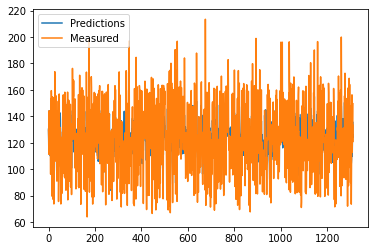

In [314]:
modelRR = train1(X_train=F_train, Y_train=T_train, epochs=1000, p=2)
with torch.no_grad():
    T_predicted = modelRR(torch.from_numpy(F_test).float()).numpy()
print_weights_biases(modelRR)
rmse1 = rmse(T_test, T_predicted)
print('Regularization: L2-norm')
print('RMSE: {} '.format(rmse1))
plot_results(T_test, T_predicted, modelRR)
plt.savefig('ridgeregression.png', bbox_inches='tight', pad_inches=2, transparent=True)